# Cross Validation for models on VGG features 
* Using the folds defined in http://ieeexplore.ieee.org.proxy.lib.uwaterloo.ca/stamp/stamp.jsp?arnumber=7312934
* For binary and and 8 class
* Using best hyperparameters found in VGG_features_hyperparameter search
* Training is done using the full training set, with no validation set.
* This was re-run on a newly created dataset compared to the hyperparameter search, because it got overly high accuracy for fold 1.

In [4]:
import os
import sys
import glob
import random
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt 
from matplotlib.pyplot import imshow
from IPython.display import display, HTML
from sklearn.metrics import accuracy_score
% matplotlib inline


# Import modules every time you run code imported using %aimport
%load_ext autoreload
%autoreload 1

# Add the src directory for functions
src_dir = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())), 'src')
print(src_dir)
sys.path.append(src_dir)

# import my functions:
%aimport models
from models import*
%aimport functions
from functions import*

# Base Directory where data is stored
# base_data_dir = '/home/rbbidart/project/rbbidart/breakHis/'
base_data_dir = '/Users/rb/Documents/waterloo/projects/breakHis'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/Users/rb/Google_Drive/2016-2017_Waterloo/projects/breakHis/src


## Logistic Regression
* Binary C=.1
* 8-class C=1

In [ ]:
from sklearn.linear_model import LogisticRegression

model_2 = LogisticRegression(C=.1)
model_8 = LogisticRegression(C=1)
cv_features(model_2, model_8, base_data_dir)

Fold  0


## Random Forest
* Binary 160, 3
* 8-class 160, 3

Fold  0
Fold  1
Fold  2
Fold  3
Fold  4
Binary classification results:


,test_acc,train_acc,fold
0,0.862205,1,fold1
1,0.803226,1,fold2
2,0.786248,1,fold3
3,0.730659,1,fold4
4,0.807552,1,fold5


Average Test Accc:  0.797977890865
Binary Classification Confusion matrix for fold 5:


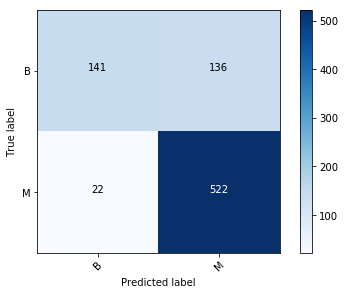

8-Class Classification Results:


,test_acc,train_acc,fold
0,0.489501,1,fold1
1,0.395161,1,fold2
2,0.437967,1,fold3
3,0.432665,1,fold4
4,0.46894,1,fold5


Average Test Accc:  0.444846958178
8-Class Classification Confusion matrix for fold 5:


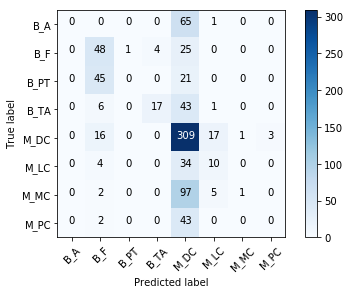

In [6]:
from sklearn.ensemble import RandomForestClassifier

model_2 = RandomForestClassifier(n_estimators=160, min_samples_split=3)
model_8 = RandomForestClassifier(n_estimators=160, min_samples_split=3)
cv_features(model_2, model_8, base_data_dir)

## XGBoost
* Binary: n_estimators=200	max_depth=8	learning_rate=0.3	reg_lambda=2
* 8-class: n_estimators=250 max_depth=9 learning_rate=0.3	reg_lambda=2 (guess)

Fold  0
Fold  1
Fold  2
Fold  3
Fold  4
Binary classification results:


,test_acc,train_acc,fold
0,0.821288,1,fold1
1,0.758065,1,fold2
2,0.751868,1,fold3
3,0.733524,1,fold4
4,0.784409,1,fold5


Average Test Accc:  0.769830873612
Binary Classification Confusion matrix for fold 5:


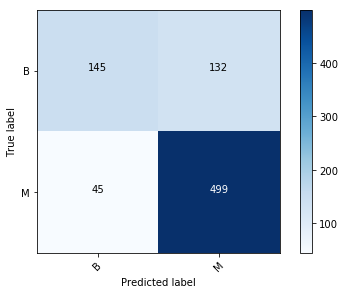

8-Class Classification Results:


,test_acc,train_acc,fold
0,0.478318,1,fold1
1,0.416129,1,fold2
2,0.415546,1,fold3
3,0.399713,1,fold4
4,0.403167,1,fold5


Average Test Accc:  0.422574592408
8-Class Classification Confusion matrix for fold 5:


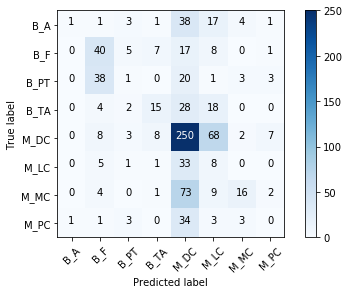

In [5]:
from xgboost import XGBClassifier

model_2 = XGBClassifier(n_estimators=200, max_depth=8, learning_rate=0.3, reg_lambda=2)
model_8 = XGBClassifier(n_estimators=200, max_depth=8, learning_rate=0.3, reg_lambda=2)
cv_features(model_2, model_8, base_data_dir)

## KNN
* 9 neighbours

Fold  0
Fold  1
Fold  2
Fold  3
Fold  4
Binary classification results:


,test_acc,train_acc,fold
0,0.745072,0.91232,fold1
1,0.703226,0.910079,fold2
2,0.672646,0.916962,fold3
3,0.673352,0.906815,fold4
4,0.730816,0.915476,fold5


Average Test Accc:  0.705022466634
Binary Classification Confusion matrix for fold 5:


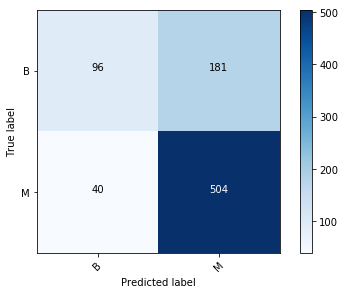

8-Class Classification Results:


,test_acc,train_acc,fold
0,0.411301,0.820389,fold1
1,0.345161,0.802533,fold2
2,0.355755,0.827018,fold3
3,0.318052,0.795192,fold4
4,0.365408,0.823214,fold5


Average Test Accc:  0.359135336614
8-Class Classification Confusion matrix for fold 5:


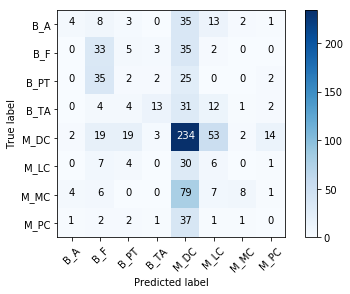

In [6]:
from sklearn.neighbors import KNeighborsClassifier

model_2 = KNeighborsClassifier(n_neighbors=9)
model_8 = KNeighborsClassifier(n_neighbors=9)
cv_features(model_2, model_8, base_data_dir)